## Introduction
This project investigates the application of **Low-Pass Filters (LPF) and High-Pass Filters (HPF)** in the frequency domain using the Fourier Transform. Low-pass filtering is used for smoothing and noise reduction, while high-pass filtering enhances edges and fine details.

### Objectives
- Transform images from the spatial domain to the frequency domain.

- Implement Ideal, Butterworth, and Gaussian filters.

- Apply both low-pass and high-pass filtering.

- Visualize filter masks, spectra, and resulting images.

- Compare the behavior and effects of different filters.

In [23]:
# Import Libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Methodology

1. Load a grayscale image.

2. Compute Fourier Transform.

3. Create LPF masks (Ideal, Butterworth, Gaussian).

4. Generate HPF masks using complement operation.

5. Apply filters in frequency domain.

6. Visualize mask, spectrum, and output image.

7. Compare results.

### Helper Functions

In [ ]:
# Function to create a distance matrix for filter design
def create_distance_matrix(rows, cols):
    crow, ccol = rows//2, cols//2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(u, v, indexing='ij')
    return np.sqrt(U**2 + V**2)


In [ ]:
# Implementing the three low-pass filters
def ideal_lpf(shape, D0):
    rows, cols = shape
    D = create_distance_matrix(rows, cols)
    H = np.zeros((rows, cols))
    H[D <= D0] = 1
    return H

def butterworth_lpf(shape, D0, n=2):
    rows, cols = shape
    D = create_distance_matrix(rows, cols)
    return 1 / (1 + (D / D0)**(2*n))

def gaussian_lpf(shape, D0):
    rows, cols = shape
    D = create_distance_matrix(rows, cols)
    return np.exp(-(D**2)/(2*(D0**2)))


In [ ]:
# Function to apply the filter in the frequency domain and return the spatial domain image
def apply_filter(fshift, H):
    filtered = fshift * H
    img_back = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(img_back)
    return np.abs(img_back), filtered


In [ ]:
# Normaliseed the image to the range [0, 255] for display
def norm(img):
    return cv2.normalize(img, None, 0, 255,
                         cv2.NORM_MINMAX).astype(np.uint8)


- Load Image
- Apply Fourier Transform

In [47]:
img = cv2.imread('./asset/rich6.jpeg', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude = 20*np.log(np.abs(fshift)+1)


In [ ]:
# Function to display the original image, magnitude spectrum, filter mask, filtered spectrum, and result image
def show_filter_pipeline(img, fshift, filter, title):
    
    # Apply filter
    result, filtered_spectrum = apply_filter(fshift, filter)

    # Convert for display
    mask_display = norm(filter)
    spectrum_display = norm(20*np.log(np.abs(fshift)+1))
    filtered_display = norm(20*np.log(np.abs(filtered_spectrum)+1))
    result_display = norm(result)

    plt.figure(figsize=(16,10))

    plt.subplot(1,5,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,5,2)
    plt.imshow(spectrum_display, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis('off')

    plt.subplot(1,5,3)
    plt.imshow(mask_display, cmap='gray')
    plt.title(f"{title} Mask")
    plt.axis('off')

    plt.subplot(1,5,4)
    plt.imshow(filtered_display, cmap='gray')
    plt.title("Filtered Spectrum")
    plt.axis('off')

    plt.subplot(1,5,5)
    plt.imshow(result_display, cmap='gray')
    plt.title("Result Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### Create LPF and HPF Masks
`Visualize each mask created`

In [ ]:
# Determine cutoff frequency D0 based on image size
rows, cols = img.shape
D0 = int(min(rows, cols) * 0.12) # 12% of the smaller dimension
print(f"Image shape: {img.shape}, D0: {D0}")


Image shape: (1280, 720), D0: 86


Apply and display results for the three low-pass filters and High-pass filters

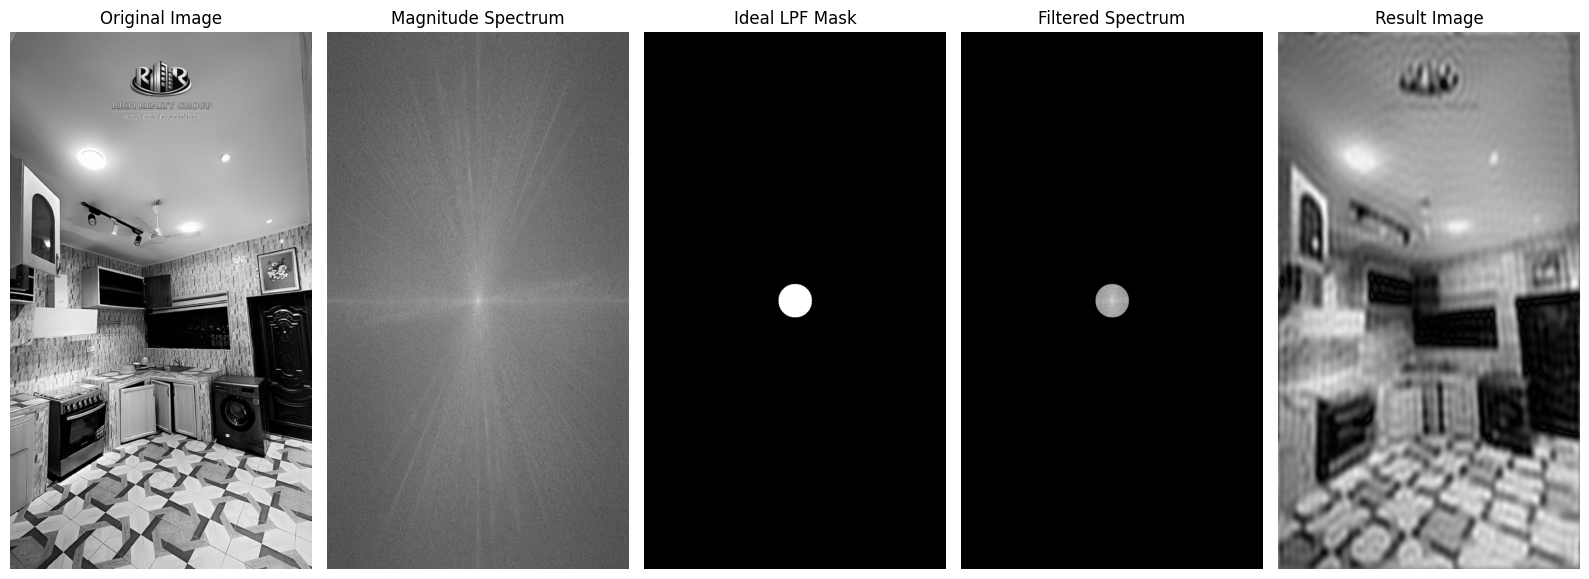

In [ ]:
ideal_low = ideal_lpf((rows, cols), D0)
show_filter_pipeline(img, fshift, ideal_low, "Ideal LPF")


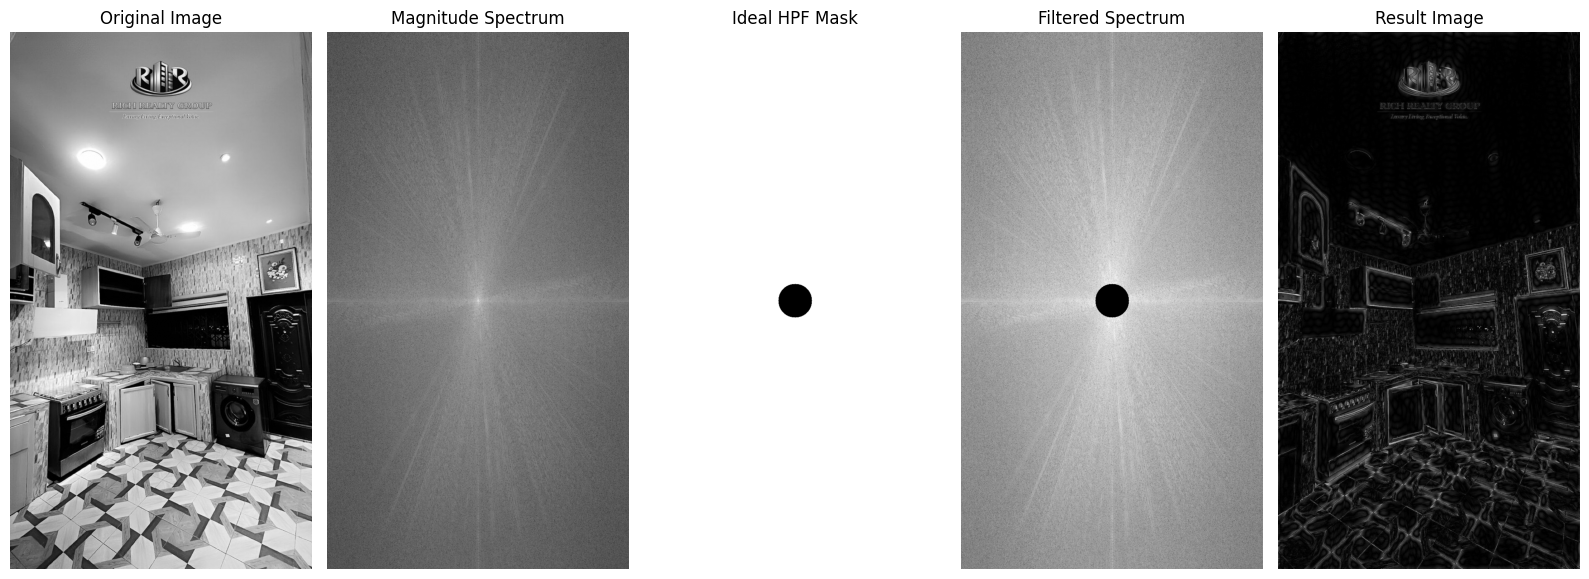

In [53]:
ideal_high = 1 - ideal_low
show_filter_pipeline(img, fshift, ideal_high, "Ideal HPF")

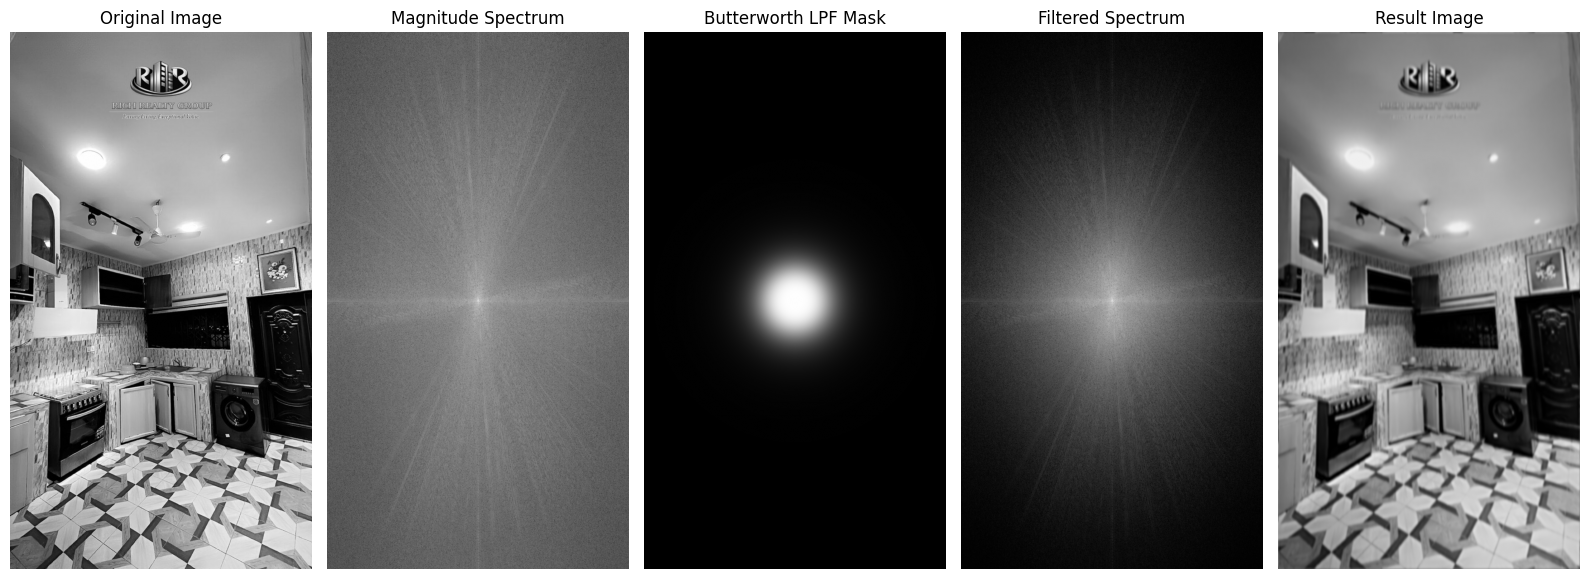

In [54]:
butter_low = butterworth_lpf((rows, cols), D0, n=2)
show_filter_pipeline(img, fshift, butter_low, "Butterworth LPF")


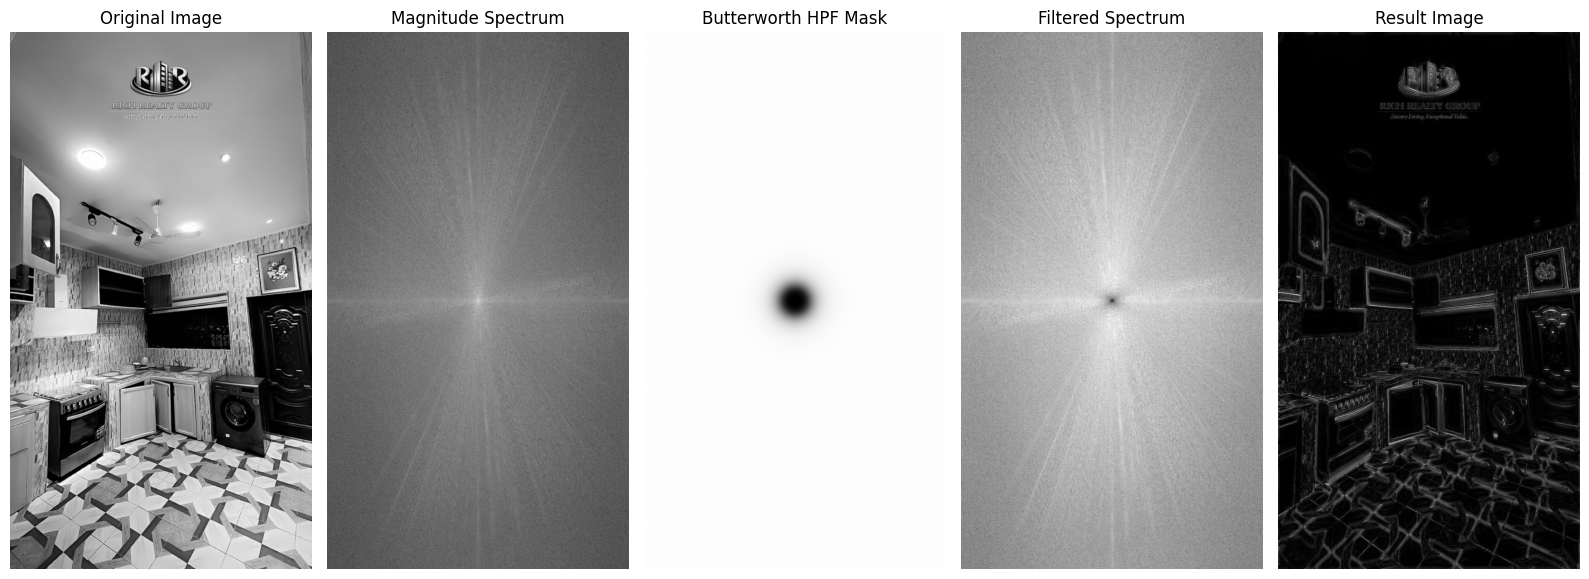

In [51]:
butter_high = 1 - butter_low
show_filter_pipeline(img, fshift, butter_high, "Butterworth HPF")

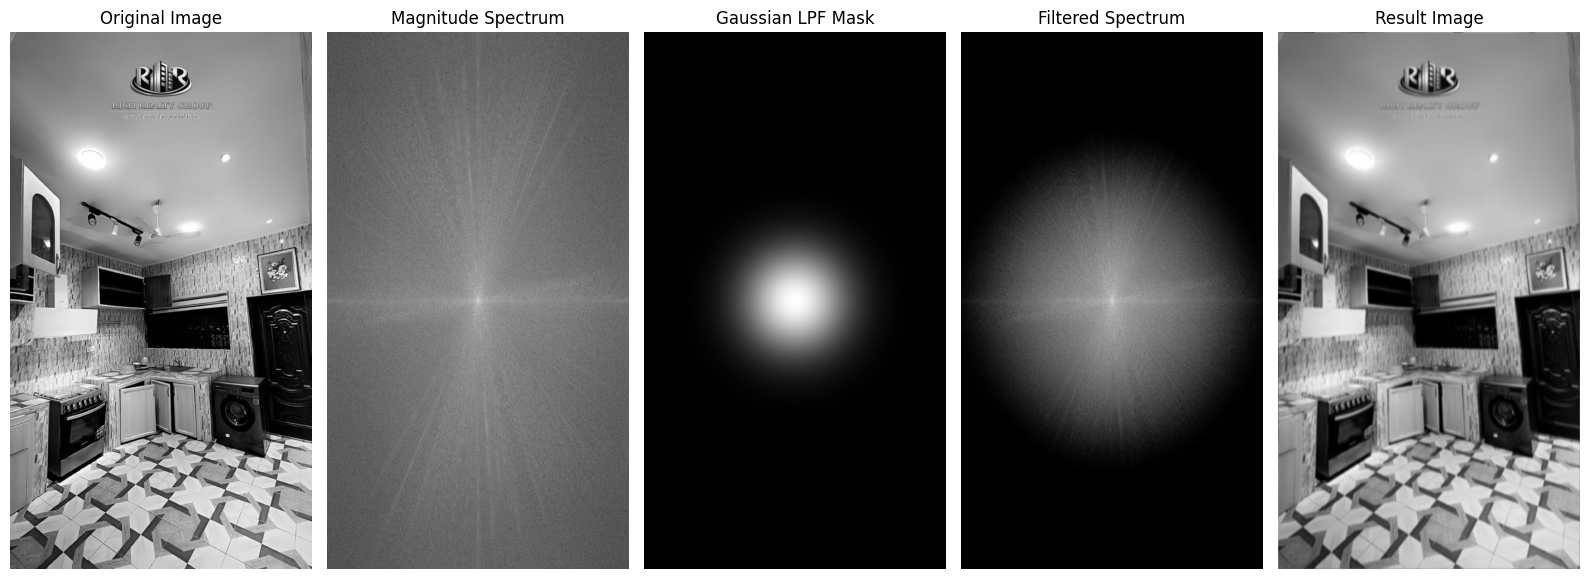

In [50]:
gauss_low = gaussian_lpf((rows, cols), D0)
show_filter_pipeline(img, fshift, gauss_low, "Gaussian LPF")


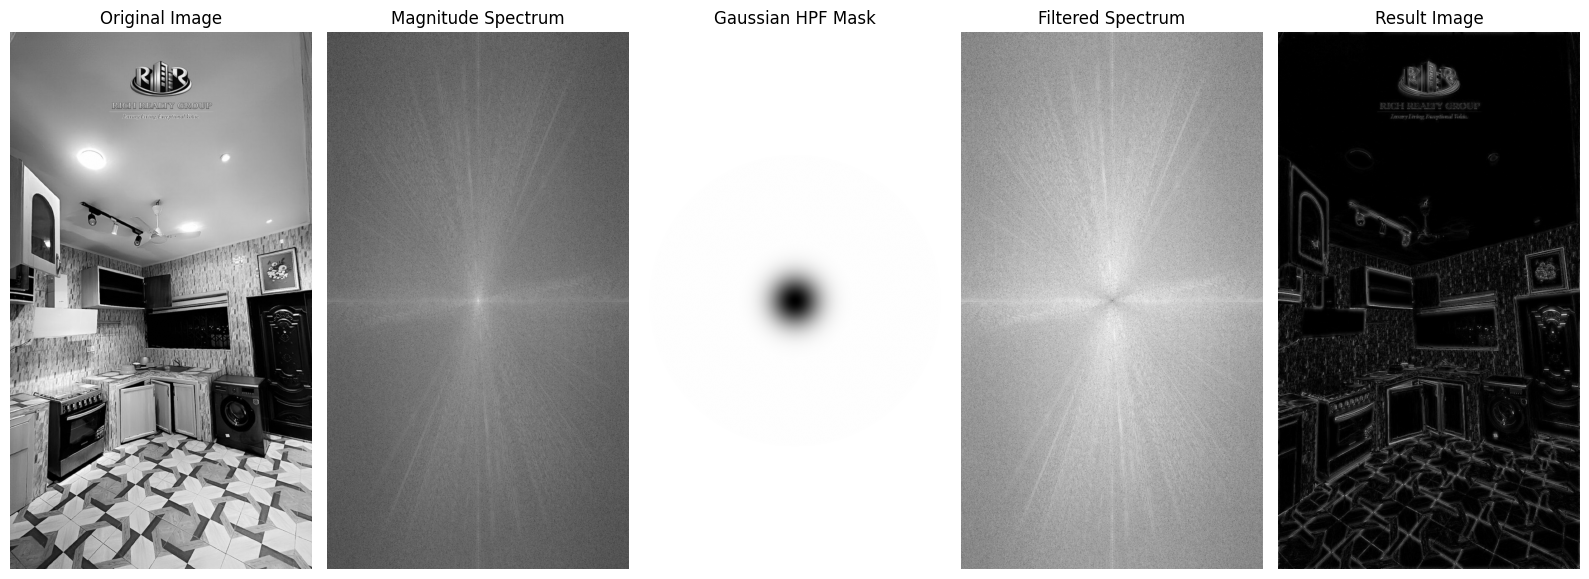

In [49]:
gauss_high = 1 - gauss_low
show_filter_pipeline(img, fshift, gauss_high, "Gaussian HPF")

### Apply Filters

In [24]:
ideal_lpf_result, ideal_lpf_spec = apply_filter(fshift, ideal_low)
butter_lpf_result, butter_lpf_spec = apply_filter(fshift, butter_low)
gauss_lpf_result, gauss_lpf_spec = apply_filter(fshift, gauss_low)

ideal_hpf_result, ideal_hpf_spec = apply_filter(fshift, ideal_high)
butter_hpf_result, butter_hpf_spec = apply_filter(fshift, butter_high)
gauss_hpf_result, gauss_hpf_spec = apply_filter(fshift, gauss_high)


### Visualization Function

In [37]:
def show_comparison(title, masks, spectra, results):
    fig, axes = plt.subplots(3,4, figsize=(16,12))

    names = ["Reference","Ideal","Butterworth","Gaussian"]

    # Row 1 — Masks
    axes[0,0].imshow(np.ones_like(img)*255,cmap='gray')
    axes[0,0].set_title("Reference")
    axes[0,0].axis('off')

    for i,m in enumerate(masks):
        axes[0,i+1].imshow(norm(m), cmap='gray')
        axes[0,i+1].set_title(f"{names[i+1]} Mask")
        axes[0,i+1].axis('off')

    # Row 2 — Spectra
    axes[1,0].imshow(norm(20*np.log(np.abs(fshift)+1)), cmap='gray')
    axes[1,0].set_title("Original Spectrum")
    axes[1,0].axis('off')

    for i,s in enumerate(spectra):
        axes[1,i+1].imshow(norm(20*np.log(np.abs(s)+1)), cmap='gray')
        axes[1,i+1].set_title(f"{names[i+1]} Spectrum")
        axes[1,i+1].axis('off')

    # Row 3 — Results
    axes[2,0].imshow(img,cmap='gray')
    axes[2,0].set_title("Original Image")
    axes[2,0].axis('off')

    for i,r in enumerate(results):
        axes[2,i+1].imshow(norm(r), cmap='gray')
        axes[2,i+1].set_title(f"{names[i+1]} Result")
        axes[2,i+1].axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


### Display LPF Comparison

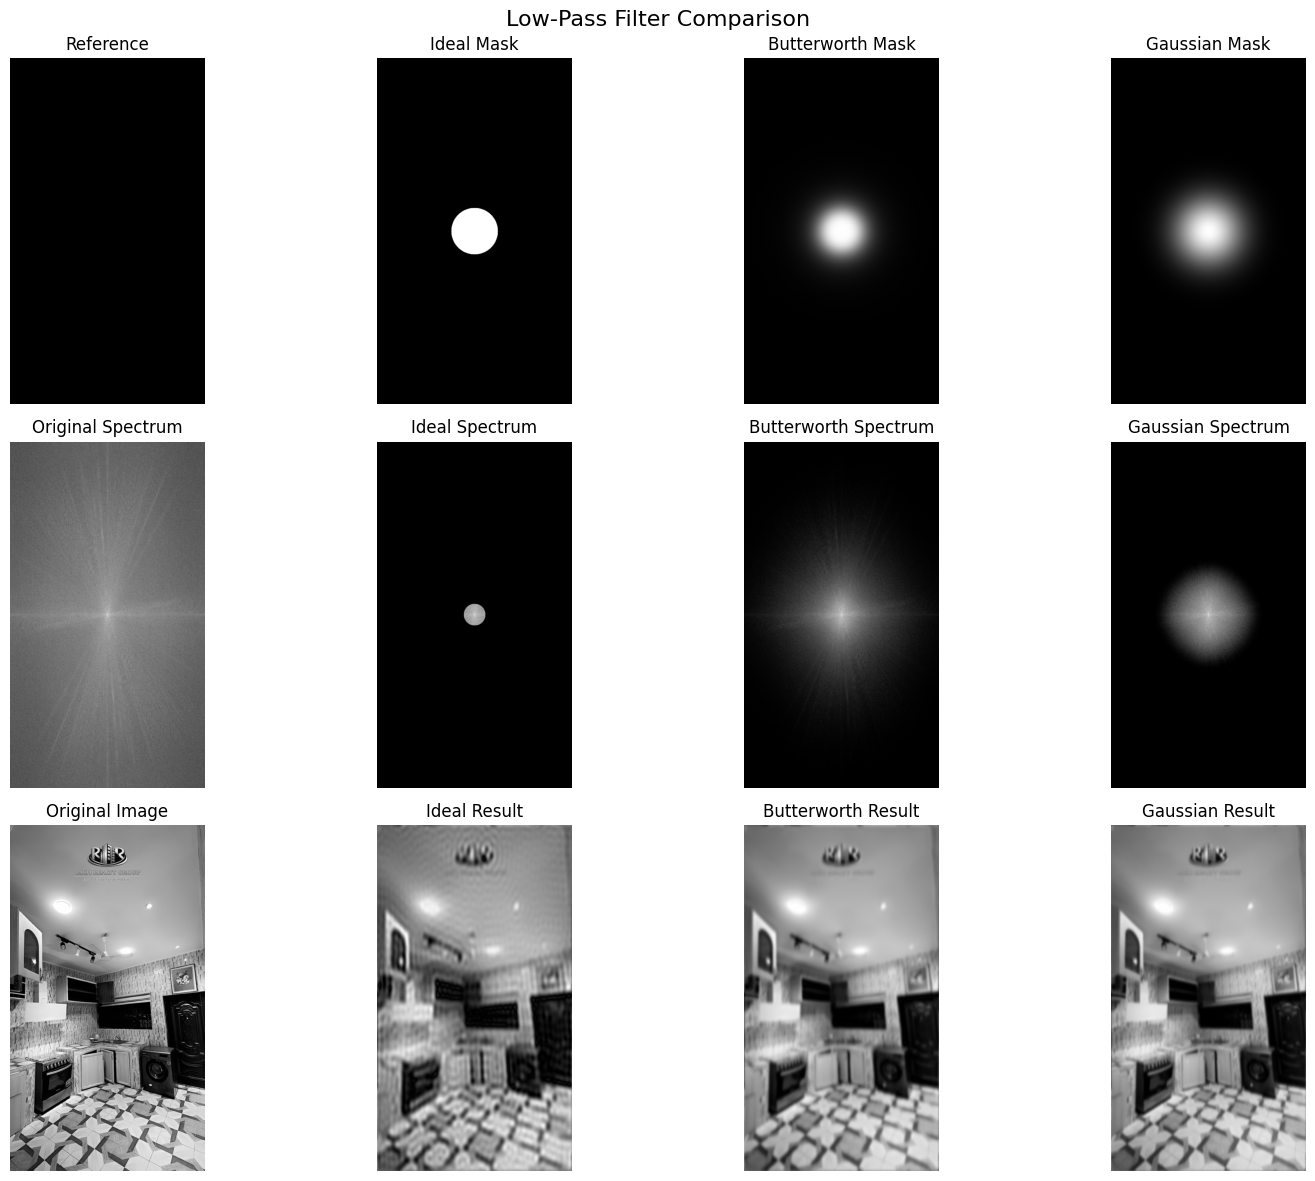

In [38]:
show_comparison(
    "Low-Pass Filter Comparison",
    [ideal_low, butter_low, gauss_low],
    [ideal_lpf_spec, butter_lpf_spec, gauss_lpf_spec],
    [ideal_lpf_result, butter_lpf_result, gauss_lpf_result]
)


### Display HPF Comparison

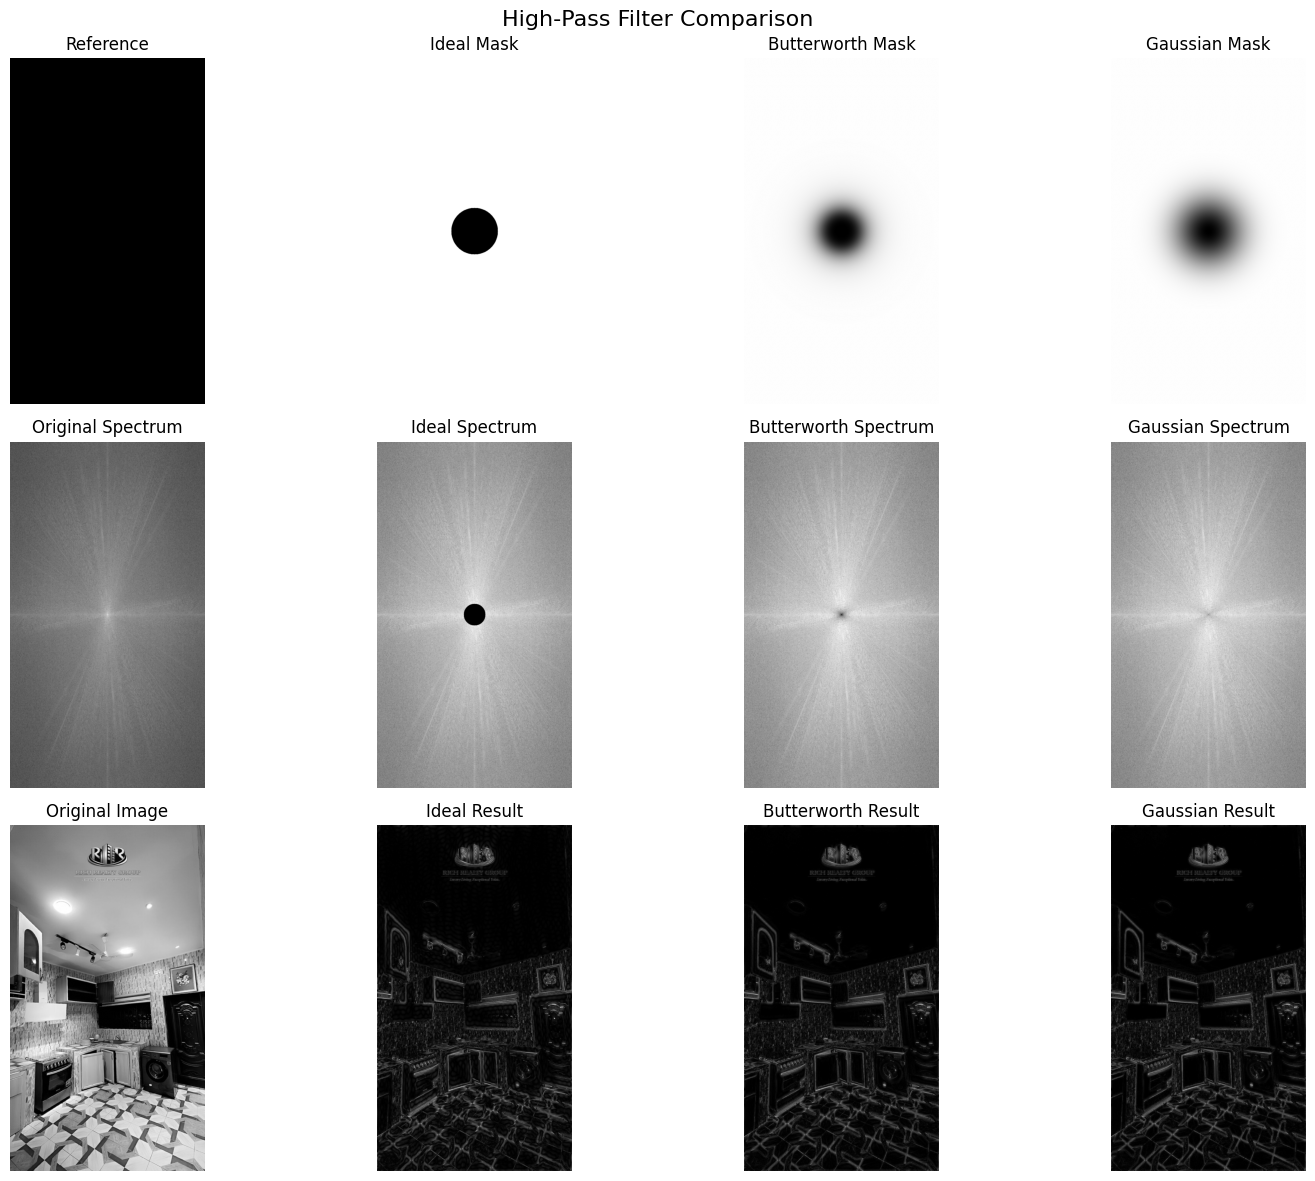

In [39]:
show_comparison(
    "High-Pass Filter Comparison",
    [ideal_high, butter_high, gauss_high],
    [ideal_hpf_spec, butter_hpf_spec, gauss_hpf_spec],
    [ideal_hpf_result, butter_hpf_result, gauss_hpf_result]
)


## Results:
The visualization presents:

- Filter masks showing frequency selection behavior.

- Spectra illustrating frequency attenuation.

- Resulting images after inverse transform.

Observations:

- LPF outputs appear smoother with reduced detail.

- HPF outputs highlight edges and fine textures.

- Gaussian filters produce smoother transitions and fewer artifacts.

## Discussion
- Ideal filters show abrupt transitions and produce ringing artifacts.

- Butterworth filters provide controlled smoothness depending on filter order.

- Gaussian filters yield natural-looking results due to gradual attenuation.

Low-pass filtering is suitable for denoising, while high-pass filtering improves edge detection and sharpening.

The cutoff frequency D0 controls the range of frequencies retained during filtering. Smaller cutoff values remove more high-frequency components, resulting in stronger smoothing in low-pass filtering and stronger edge emphasis in high-pass filtering. In this project, a cutoff value of 40 was selected to provide a balanced visualization between detail preservation and frequency suppression for medium-sized images.

## Strengths

One major strength of this project is the implementation and comparison of three different 
filter types — Ideal, Butterworth, and Gaussian — within a single unified pipeline. This 
made it possible to directly observe how each filter behaves differently in the frequency 
domain, rather than studying them in isolation.

The decision to work in the frequency domain using the Fourier Transform is itself a 
strength. It gives precise mathematical control over which frequency components are kept 
or removed, making the filtering process more transparent and interpretable compared to 
spatial domain methods.

Deriving the high-pass filters using the complement operation (H_HPF = 1 - H_LPF) was 
an elegant and consistent approach. It guaranteed that each LPF and HPF pair operated on 
exactly the same frequency range, making comparisons between them fair and meaningful.

The visualization pipeline built for this project is also a notable strength. Displaying 
the original image, magnitude spectrum, filter mask, filtered spectrum, and reconstructed 
image together in a single figure allows anyone reviewing the work to follow the entire 
filtering process step by step without any ambiguity.

Finally, the normalization step applied before displaying results was a practical but 
important decision. High-pass filtered images in particular tend to appear very dark 
before normalization, so this ensured all outputs were visually clear and comparable 
regardless of their original pixel range.

## Challenges Encountered
- Understanding frequency spectrum visualization.

- Selecting appropriate cutoff frequency D0

- High-pass outputs appearing dark before normalization.

- Interpreting ringing artifacts in ideal filtering.

- Structuring comparisons for clear interpretation.

## Conclusion
This project demonstrated frequency-domain filtering using Fourier Transform and compared Ideal, Butterworth, and Gaussian filters for both low-pass and high-pass operations. The results show that smoother filters such as Gaussian provide visually superior results with fewer artifacts, while ideal filters offer sharper but less realistic frequency separation.

__Real-World Application__
- Medical image enhancement

- Satellite image analysis

- Face recognition preprocessing